### About the data

This is the data of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

In [1]:
#Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(12,6)
sns.set_style('darkgrid')

In [2]:
#read the csv file

motor= pd.read_csv('sales_data.csv', parse_dates=['date'])
motor.head(10)

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card
5,2021-06-01,North,Wholesale,Suspension & traction,40,37.37,1494.80,Transfer
6,2021-06-01,West,Retail,Electrical system,2,27.20,54.41,Credit card
7,2021-06-01,Central,Retail,Breaking system,10,22.44,224.38,Credit card
8,2021-06-01,West,Wholesale,Frame & body,40,39.50,1579.87,Transfer
9,2021-06-01,North,Retail,Frame & body,6,45.44,272.61,Credit card


### Understanding the data

In [3]:
motor.shape

(1000, 8)

- The data set has 1000 rows and the 8 columns

In [4]:
motor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


- The data set has no missing entries, hence it is a complete data set. 
- There are 4 columns that contains 'objects', 2 columns that contains 'float variable', 1 column that contain an 'integer' and 1 column that contains the 'date values'

In [5]:
motor.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


- This shows the description of all the numerical variables in the data set.
- The data also shows that the mean and standard deviation are in close range and not dispersed, in other words, there are no outliers.

In [6]:
motor.isnull().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

- This is the sum of all the missing variables in each column. In this data set, there are no missing varibles.

In [7]:
duplicate= motor[motor.duplicated()]
duplicate

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment


- This shows that there are no duplicates in the column headers

In [8]:
#To give the total number of duplicates if there are

print(f'Number of duplicate values are : {len(duplicate)}') 

Number of duplicate values are : 0


### To check for unique objects in the column


In [9]:
motor.warehouse.unique()

array(['Central', 'North', 'West'], dtype=object)

In [10]:
motor.warehouse.nunique()

3

In [11]:
motor.client_type.unique()

array(['Retail', 'Wholesale'], dtype=object)

In [12]:
motor.client_type.nunique()

2

In [13]:
motor.product_line.unique()

array(['Miscellaneous', 'Breaking system', 'Suspension & traction',
       'Frame & body', 'Engine', 'Electrical system'], dtype=object)

In [14]:
motor.product_line.nunique()

6

In [15]:
motor.payment.unique()

array(['Credit card', 'Cash', 'Transfer'], dtype=object)

In [16]:
motor.payment.nunique()

3

### Observations from the data

1. The dataset contains information from June to August, 2021
2. The company has two client types: Retail and Wholesale
3. The company operates in three warehouses in the Noth, West and Central
4. The products purchased are grouped into 6 product lines
5. The company accepts three payment methods: credit card cash, and Transfer

### Analysing the data

#### Total sales for each warehouse

In [17]:
#first method
motor.groupby('warehouse')[['total']].sum()

,total
warehouse,
Central,141982.88
North,100203.63
West,46926.49


In [18]:
#second method
tot_sales_warehouse= motor.groupby('warehouse').total.agg(['sum']).reset_index()
tot_sales_warehouse

,warehouse,sum
0,Central,141982.88
1,North,100203.63
2,West,46926.49


Text(0, 0.5, 'Total sales')

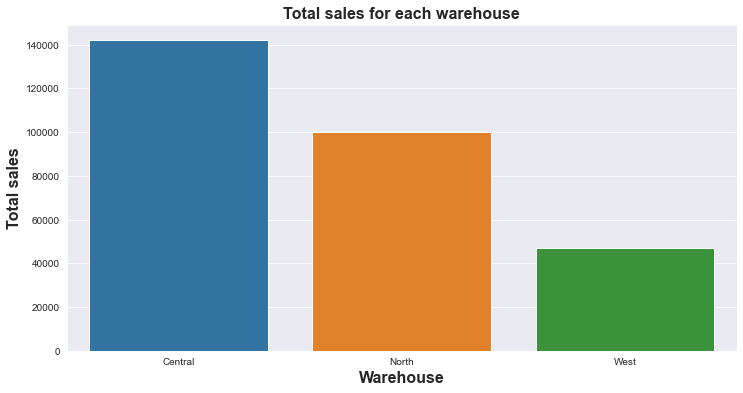

In [19]:
sns.barplot(x= 'warehouse', y='sum', data=tot_sales_warehouse)
plt.title('Total sales for each warehouse', fontweight='bold', fontsize= 16)
plt.xlabel('Warehouse', fontweight='bold', fontsize= 16)
plt.ylabel('Total sales', fontweight='bold', fontsize=16)

#### Observation
- The warehouse at the central zone has the highest motocycle sales while the west has the lowest sales.

#### Total sales for each payment method

In [20]:
#first method
motor.groupby('payment')[['total']].sum()

,total
payment,
Cash,19199.10
Credit card,110271.57
Transfer,159642.33


In [21]:
#second method
total_sales_payment= motor.groupby('payment').total.agg(['sum']).reset_index()
total_sales_payment

,payment,sum
0,Cash,19199.10
1,Credit card,110271.57
2,Transfer,159642.33


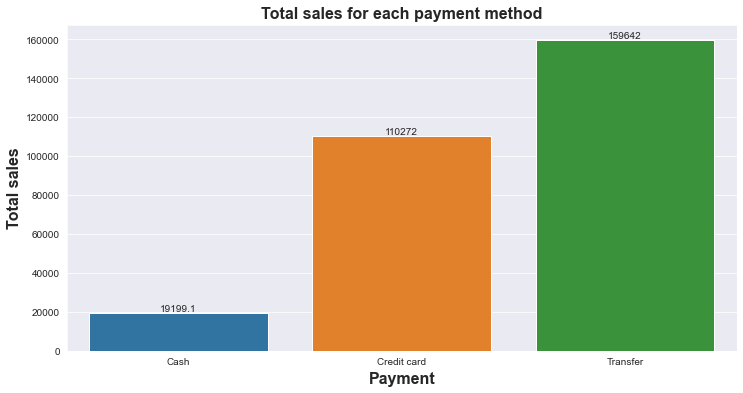

In [22]:
am= sns.barplot(x='payment',y= 'sum', data= total_sales_payment)
plt.title('Total sales for each payment method', fontweight= 'bold', fontsize= 16)
plt.xlabel('Payment', fontweight= 'bold', fontsize=16)
plt.ylabel('Total sales', fontweight= 'bold', fontsize=16);
for i in am.containers:
    am.bar_label(i)

#### Observation
- This shows that more sales were made by the transfer payment method. This could be due to the ease that comes with making transactions by the use of ussd code.
- The cash payment method is least used for payment due to the fact that many have adopted the cashless policy and only a few move about with cash. This also comes with security to some extent.

#### Average unit price for each product line

In [23]:
#First method 
motor.groupby('product_line')[['unit_price']].mean()

,unit_price
product_line,
Breaking system,17.740522
Electrical system,25.585130
Engine,60.091803
Frame & body,42.832229
Miscellaneous,22.810738
Suspension & traction,33.969868


In [24]:
#second method gives an index number
avg_unit_price= motor.groupby('product_line').unit_price.mean().reset_index()
avg_unit_price

,product_line,unit_price
0,Breaking system,17.740522
1,Electrical system,25.585130
2,Engine,60.091803
3,Frame & body,42.832229
4,Miscellaneous,22.810738
5,Suspension & traction,33.969868


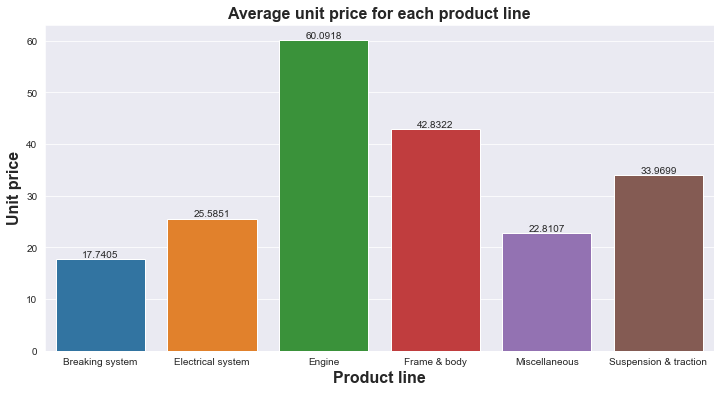

In [25]:
gh= sns.barplot(x= 'product_line', y='unit_price', data= avg_unit_price)
plt.title('Average unit price for each product line', fontweight='bold', fontsize=16)
plt.xlabel('Product line', fontweight= 'bold', fontsize=16)
plt.ylabel('Unit price', fontweight= 'bold', fontsize=16)
for i in gh.containers:
    gh.bar_label(i)

#### Observation
- This shows that the Engine, which is one of the product lines has the highest unit price. This is because the engine is the critical part of a motocycle.
- Next to it is the frame and body which is also an essential part of the motocycle.
- The least unit price is the breaking system, which is equally vital but less expensive.

### Average purchase value by client type 

In [26]:
avg_purchase_client= motor.groupby('client_type').total.mean().reset_index()
avg_purchase_client

,client_type,total
0,Retail,167.058929
1,Wholesale,709.521467


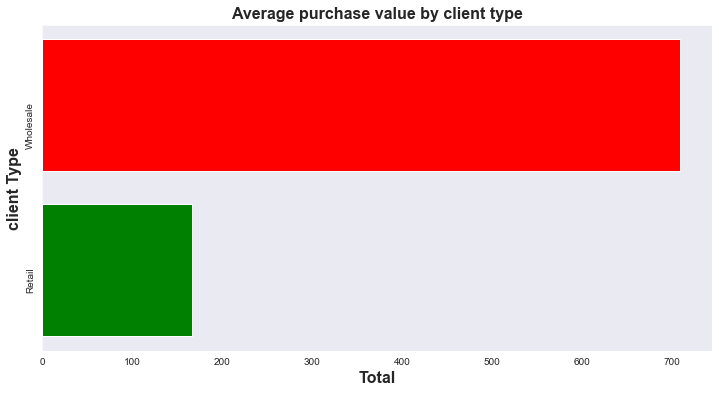

In [27]:
my_color=('Green','Red')
plt.barh(avg_purchase_client.client_type, avg_purchase_client.total, color=my_color)
plt.title('Average purchase value by client type', fontweight='bold', fontsize=16)
plt.ylabel('client Type', fontweight='bold', fontsize=16)
plt.xlabel('Total', fontweight='bold', fontsize=16)
plt.grid(False)
plt.yticks(rotation = 90)
plt.show()

#### Observation
- This shows that wholesale purchase was more compared to the retail purchase.

### Total purchase value by product line

In [28]:
tot_purchase_product= motor.groupby('product_line').total.agg(['sum']).reset_index()
tot_purchase_product

,product_line,sum
0,Breaking system,38350.15
1,Electrical system,43612.71
2,Engine,37945.38
3,Frame & body,69024.73
4,Miscellaneous,27165.82
5,Suspension & traction,73014.21


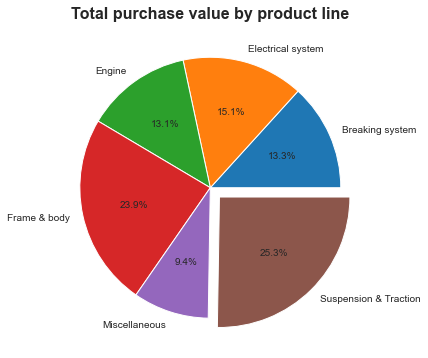

In [30]:
#plotting a pie chart
product_line=['Breaking system', 'Electrical system', 'Engine','Frame & body','Miscellaneous', 'Suspension & Traction']
sales=np.array([38350.15, 43612.71, 37945.38, 69024.73, 27165.82, 73014.21])
my_explode= [0,0,0,0,0,0.1]
plt.pie(sales,labels=product_line, explode= my_explode, autopct='%1.1f%%')
plt.title('Total purchase value by product line', fontweight='bold', fontsize=16);

#### Observation
- Suspension and Traction is the most purchased product line with total purchase of 73,014 Naira, which takes 25% of the total purchase. 
- Next to it is the frame body with 69,024 Naira, which takes 23.9% of the total purchase.
- However, it is observed that the Engine had the highest unit pice value but not the most purchased product.